## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
df = pd.read_csv('C:/Users/asus/OneDrive/Desktop/EDA/Covid_Data.csv')

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
#convert the columns name in lower case
df.columns = [col.lower() for col in df.columns]

In [5]:
df.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64 
 14  other_disease         1048575 non-null  int64 
 15

## Data Preprossesing

### Analyzing the missing data

In [7]:
df.isna().sum()

usmer                   0
medical_unit            0
sex                     0
patient_type            0
date_died               0
intubed                 0
pneumonia               0
age                     0
pregnant                0
diabetes                0
copd                    0
asthma                  0
inmsupr                 0
hipertension            0
other_disease           0
cardiovascular          0
obesity                 0
renal_chronic           0
tobacco                 0
clasiffication_final    0
icu                     0
dtype: int64

**As per above cell, there are no null values, but as mentioned in the data dictionary we have missing values.**

- **Checking the missing values (97, 98, 99)**

In [8]:
for col in df.columns:
    print(col)
    print(df.loc[df[col] == 97, col].count())
    print(df.loc[df[col] == 98, col].count())
    print(df.loc[df[col] == 99, col].count())
    print()

usmer
0
0
0

medical_unit
0
0
0

sex
0
0
0

patient_type
0
0
0

date_died
0
0
0

intubed
848544
0
7325

pneumonia
0
0
16003

age
135
124
86

pregnant
523511
3754
0

diabetes
0
3338
0

copd
0
3003
0

asthma
0
2979
0

inmsupr
0
3404
0

hipertension
0
3104
0

other_disease
0
5045
0

cardiovascular
0
3076
0

obesity
0
3032
0

renal_chronic
0
3006
0

tobacco
0
3220
0

clasiffication_final
0
0
0

icu
848544
0
7488



- **Parsing the missing values of the 'pregnant' column**

In [9]:
df.groupby(['pregnant', 'sex'])['sex'].count()

pregnant  sex
1         1        8131
2         1      513179
97        2      523511
98        1        3754
Name: sex, dtype: int64

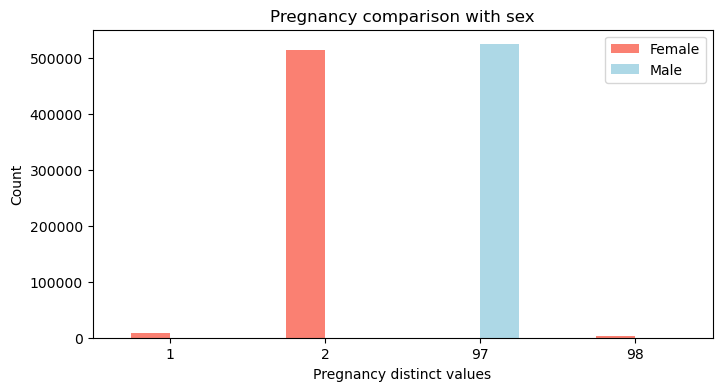

In [10]:
# Checking the count of unique vales of pregnant field on the basis of sex.
pd.crosstab(df.pregnant, df.sex).plot(kind="bar", figsize=(8,4), color=["salmon","lightblue"])
plt.title("Pregnancy comparison with sex")
plt.xlabel("Pregnancy distinct values")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

**As we can see in above cell all the records containing 97 as the value is of male and male can't get pregnant so moving all these records to not pregnant(2 value)**

In [11]:
df.pregnant = df.pregnant.replace(97, 2)

In [12]:
df.pregnant.value_counts()

2     1036690
1        8131
98       3754
Name: pregnant, dtype: int64

- **Parsing the missing values of the 'intubed' and 'icu' columns**

In [13]:
df.groupby(['intubed', 'patient_type'])['patient_type'].count()

intubed  patient_type
1        2                33656
2        2               159050
97       1               848544
99       2                 7325
Name: patient_type, dtype: int64

In [14]:
df.groupby(['icu', 'patient_type'])['patient_type'].count()

icu  patient_type
1    2                16858
2    2               175685
97   1               848544
99   2                 7488
Name: patient_type, dtype: int64

- Both columns have relation with 'patient_type' column
- The values 97 are of patients return to home
- Let's drop these columns, because are so many missing values

In [15]:
df.drop(['intubed', 'icu'], axis=1, inplace=True)

In [16]:
df.head(2)

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5


In [17]:
df.drop(df.index[df.pneumonia == 99], axis=0, inplace=True)
df.drop(df.index[df.pregnant == 98], axis=0, inplace=True)
df.drop(df.index[df.copd == 98], axis=0, inplace=True)
df.drop(df.index[df.diabetes == 98], axis=0, inplace=True)
df.drop(df.index[df.asthma == 98], axis=0, inplace=True)
df.drop(df.index[df.inmsupr == 98], axis=0, inplace=True)
df.drop(df.index[df.other_disease == 98], axis=0, inplace=True)
df.drop(df.index[df.cardiovascular == 98], axis=0, inplace=True)
df.drop(df.index[df.obesity == 98], axis=0, inplace=True)
df.drop(df.index[df.renal_chronic == 98], axis=0, inplace=True)
df.drop(df.index[df.tobacco == 98], axis=0, inplace=True)

- **See the missing values again**

In [18]:
for col in df.columns:
    print(col)
    print(df.loc[df[col] == 97, col].count())
    print(df.loc[df[col] == 98, col].count())
    print(df.loc[df[col] == 99, col].count())
    print()

usmer
0
0
0

medical_unit
0
0
0

sex
0
0
0

patient_type
0
0
0

date_died
0
0
0

pneumonia
0
0
0

age
128
115
79

pregnant
0
0
0

diabetes
0
0
0

copd
0
0
0

asthma
0
0
0

inmsupr
0
0
0

hipertension
0
178
0

other_disease
0
0
0

cardiovascular
0
0
0

obesity
0
0
0

renal_chronic
0
0
0

tobacco
0
0
0

clasiffication_final
0
0
0



#### Analyzing DATE_DIED field

In [19]:
df['date_died'].value_counts()

9999-99-99    947485
06/07/2020       984
07/07/2020       981
13/07/2020       969
16/06/2020       965
               ...  
27/02/2021         1
26/02/2021         1
20/02/2021         1
11/02/2021         1
22/04/2021         1
Name: date_died, Length: 395, dtype: int64

In [20]:
#Creating a new column 'died'
df['died'] = [2 if i=='9999-99-99' else 1 for i in df.date_died]

In [21]:
# Now we can remove the date_died field
df.drop('date_died', axis=1, inplace=True)

In [22]:
df.head(2)

,usmer,medical_unit,sex,patient_type,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1


## Exploratory Data Analysis

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022155 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   usmer                 1022155 non-null  int64
 1   medical_unit          1022155 non-null  int64
 2   sex                   1022155 non-null  int64
 3   patient_type          1022155 non-null  int64
 4   pneumonia             1022155 non-null  int64
 5   age                   1022155 non-null  int64
 6   pregnant              1022155 non-null  int64
 7   diabetes              1022155 non-null  int64
 8   copd                  1022155 non-null  int64
 9   asthma                1022155 non-null  int64
 10  inmsupr               1022155 non-null  int64
 11  hipertension          1022155 non-null  int64
 12  other_disease         1022155 non-null  int64
 13  cardiovascular        1022155 non-null  int64
 14  obesity               1022155 non-null  int64
 15  renal_chronic  

### Died Field

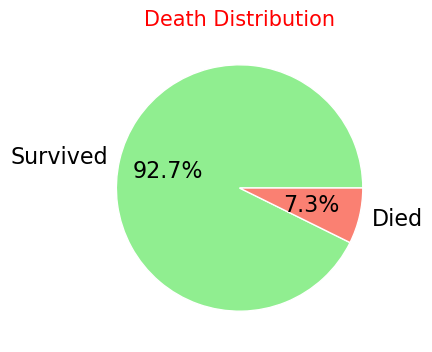

In [128]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.pie(
    df.died.value_counts().values, labels=['Survived', 'Died'], autopct='%0.1f%%',
    startangle=0, textprops={'fontsize': 16}, wedgeprops={'edgecolor': '#fff'}, colors=["lightgreen", "salmon"]
)
ax.set_title('Death Distribution', fontsize=15, color='red')
plt.show()

**We can see in the above graph that 92.7% patient has survived in covid 19 pandemic.**

### Age Field

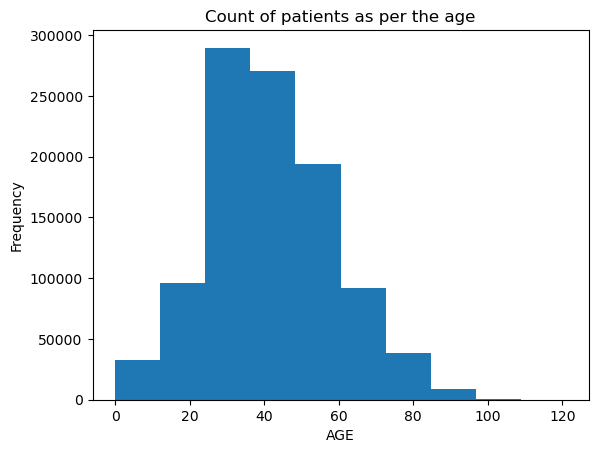

In [99]:
# Checking the DEAD field.
df['age'].plot(kind='hist')
plt.xlabel("AGE")
plt.title("Count of patients as per the age");

**`We can see most of the patients lie between 20 to 80 years of age.`**

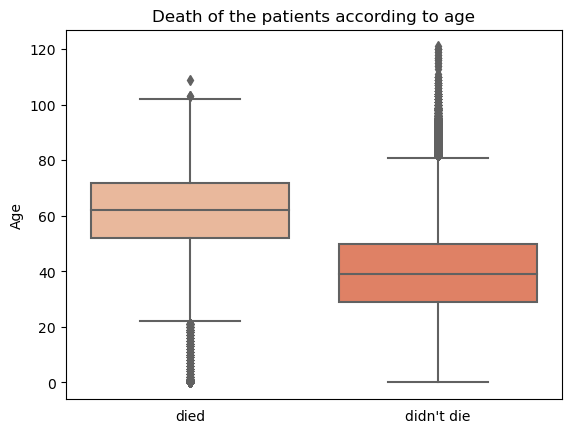

In [136]:
sns.boxplot(x="died", y="age",data=df,palette=sns.color_palette("rocket_r"))
plt.title("Death of the patients according to age")
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['died', 'didn\'t die'], fontsize=10)
plt.xlabel(None)
plt.ylabel('Age', fontsize=10);

**We can observe few points from the above plot :**
1. Most of the deaths occurs between 50 to 70 age.
2. But we can also see few patients with age between 0 and 20.

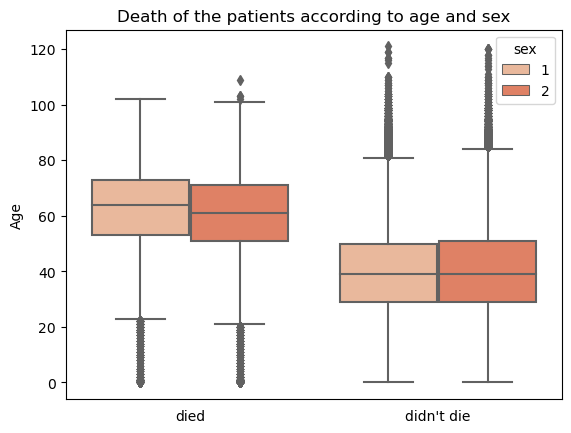

In [135]:
sns.boxplot(x="died", y="age",data=df,palette=sns.color_palette("rocket_r"), hue='sex')
plt.title("Death of the patients according to age and sex")
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['died', 'didn\'t die'], fontsize=10)
plt.xlabel(None)
plt.ylabel('Age', fontsize=10);

**Not much of the difference for sex when comparing with age and death.**

### CLASIFFICATION_FINAL field

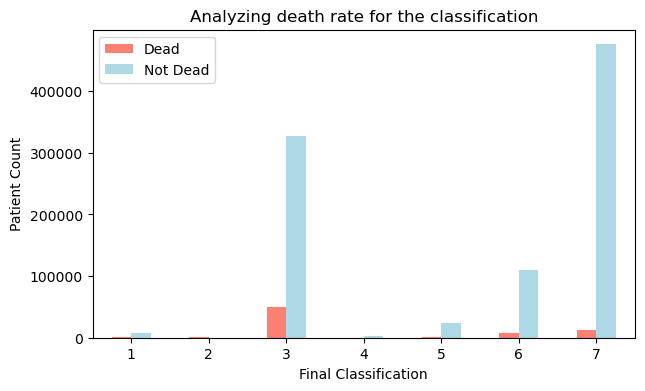

In [116]:
pd.crosstab(df.clasiffication_final, df.died).plot(kind="bar", figsize=(7,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate for the classification")
plt.xlabel("Final Classification")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.xticks(rotation=0);

##### Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

**`Above plot tells us that patients with classification id as 7 has very less chance of death as they are not the carrier of the virus.`**

### Sex Field

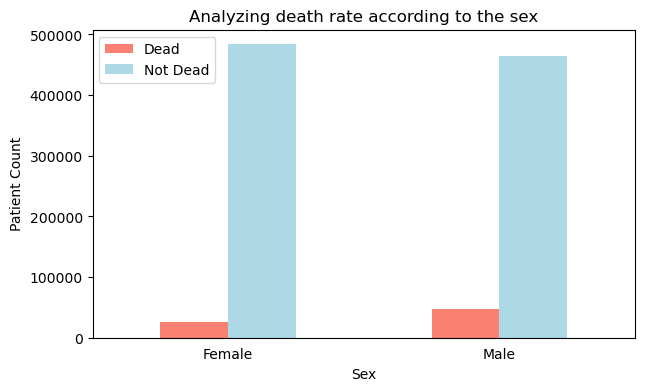

In [139]:
pd.crosstab(df.sex, df.died).plot(kind="bar", figsize=(7,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate according to the sex")
plt.xlabel("Sex")
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Female', 'Male'], fontsize=10)
plt.xticks(rotation=0);

**`Death rate of males are more in comparison to females however female patients are slightly more than men patients `**

### DIABETES field

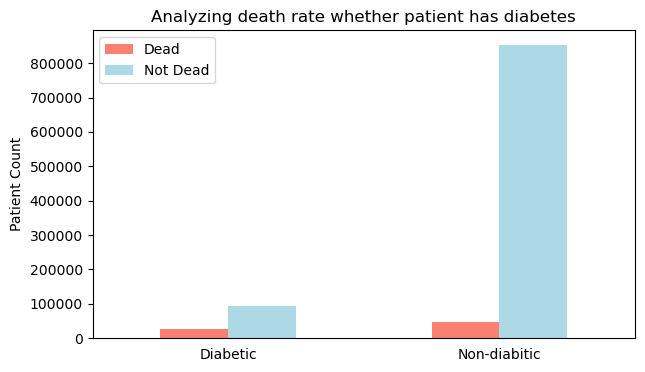

In [144]:
pd.crosstab(df.diabetes,df.died).plot(kind="bar", figsize=(7,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has diabetes")
plt.xlabel(None)
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Diabetic', 'Non-diabitic'], fontsize=10)
plt.xticks(rotation=0);

**`We can see that if patient is not having diabetes, there is more chance that he will not die.`**

### ASTHMA field

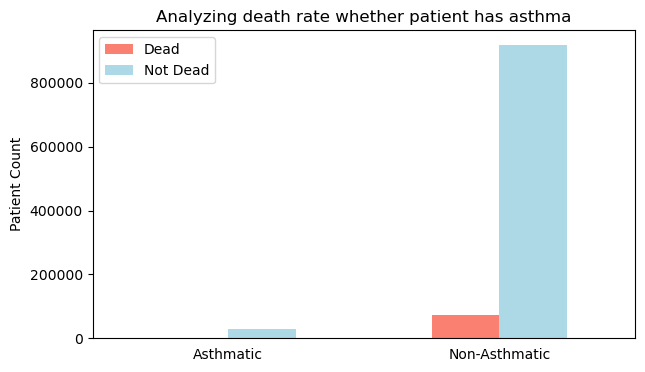

In [145]:
pd.crosstab(df.asthma, df.died).plot(kind="bar", figsize=(7,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has asthma")
plt.xlabel(None)
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Asthmatic', 'Non-Asthmatic'], fontsize=10)
plt.xticks(rotation=0);

**`We can see that if patient is not diagonized with Asthma, there is more chance that he will not die.`**

### PNEUMONIA field

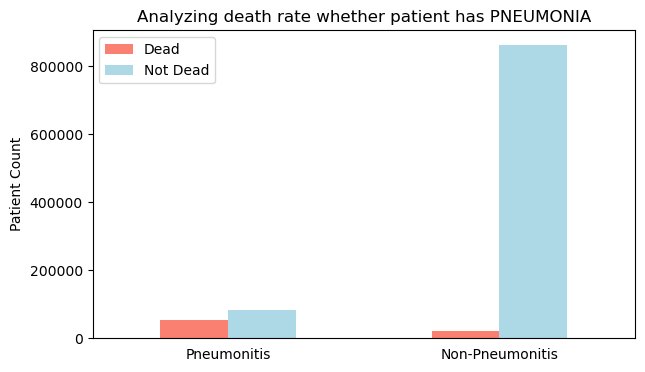

In [146]:
pd.crosstab(df.pneumonia, df.died).plot(kind="bar", figsize=(7,4), color=["salmon","lightblue"])
plt.title("Analyzing death rate whether patient has PNEUMONIA")
plt.xlabel(None)
plt.ylabel("Patient Count")
plt.legend(["Dead", "Not Dead"])
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Pneumonitis', 'Non-Pneumonitis'], fontsize=10)
plt.xticks(rotation=0);

**`Death rate of pneumonia diagonized patients are more in comparison to others`**

### Analyzing correlation between different features

In [148]:
corr_matrix = df.corr()
corr_matrix

,usmer,medical_unit,sex,patient_type,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
usmer,1.000000,0.124427,-0.002888,-0.188579,0.151192,-0.057893,-0.001622,0.058646,0.024300,0.010828,0.014615,0.015678,0.022715,0.019724,0.009757,0.040380,-0.015843,0.041978,0.118949
medical_unit,0.124427,1.000000,0.002154,-0.212081,0.109952,-0.086927,-0.001013,0.073361,0.036486,0.017218,0.031029,0.032266,0.118448,0.027301,0.027713,0.062344,-0.011188,0.085215,0.154429
sex,-0.002888,0.002154,1.000000,0.089327,-0.079723,0.029112,0.088093,-0.010900,-0.002918,0.044619,0.007184,0.000876,0.023155,-0.011122,0.018135,-0.013631,-0.101756,-0.057872,-0.080380
patient_type,-0.188579,-0.212081,0.089327,1.000000,-0.652444,0.322349,-0.009618,-0.257157,-0.115587,0.013516,-0.091120,-0.063039,-0.091734,-0.103050,-0.064374,-0.148824,-0.004701,-0.192648,-0.520156
pneumonia,0.151192,0.109952,-0.079723,-0.652444,1.000000,-0.280176,-0.014927,0.216237,0.093025,-0.010551,0.062917,0.050741,0.054230,0.081165,0.072024,0.105372,0.011064,0.194087,0.470879
age,-0.057893,-0.086927,0.029112,0.322349,-0.280176,1.000000,0.072434,-0.330722,-0.164735,0.024835,-0.033316,-0.104024,-0.039859,-0.131469,-0.086919,-0.100966,-0.011535,-0.151762,-0.322687
pregnant,-0.001622,-0.001013,0.088093,-0.009618,-0.014927,0.072434,1.000000,-0.024590,-0.008306,-0.001279,-0.001677,-0.008129,0.014249,-0.009141,-0.018043,-0.009428,-0.018778,-0.007314,-0.021065
diabetes,0.058646,0.073361,-0.010900,-0.257157,0.216237,-0.330722,-0.024590,1.000000,0.095921,0.003747,0.053549,0.102339,0.032495,0.107918,0.115868,0.166250,0.012963,0.096938,0.217139
copd,0.024300,0.036486,-0.002918,-0.115587,0.093025,-0.164735,-0.008306,0.095921,1.000000,0.035686,0.054561,0.031075,0.036290,0.108346,0.038681,0.065380,0.063886,0.010692,0.089720
asthma,0.010828,0.017218,0.044619,0.013516,-0.010551,0.024835,-0.001279,0.003747,0.035686,1.000000,0.021282,0.004575,0.013715,0.019902,0.045080,0.003113,0.005985,-0.015440,-0.017308


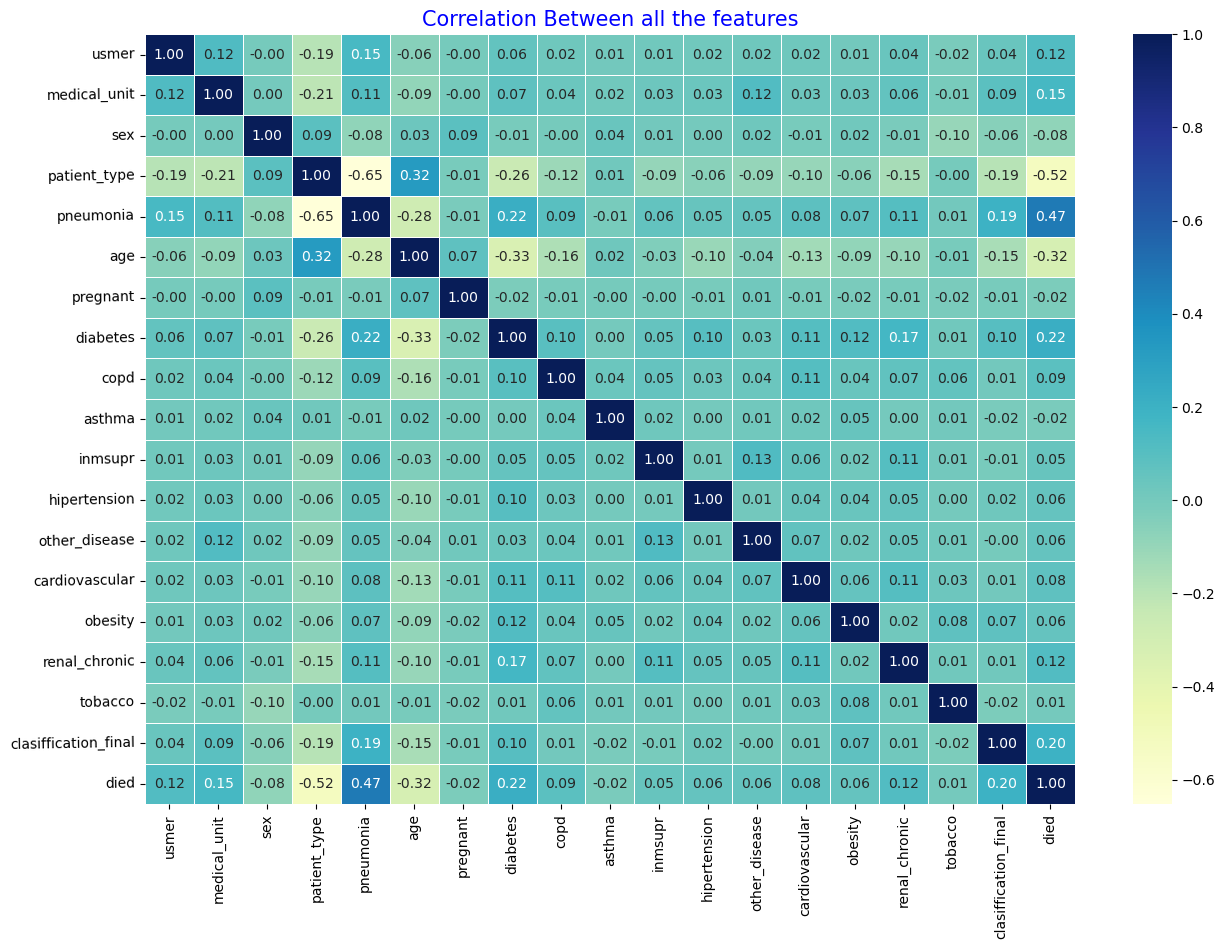

In [149]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
plt.yticks(rotation=1)
plt.title("Correlation Between all the features", fontsize=15, c='blue');